# The Battle of Neighborhoods 
## Classification of areas into residential and commercial  
**(Applied Data Science Capstone Project)**

## 1. Introduction/Business Problem:

Bengaluru is the capital of the Indian state of Karnataka. It has a population of more than 11 million, making it the third-most populous city and fifth-most populous urban agglomeration in India. Located in southern India on the Deccan Plateau, at a height of over 900 m (3,000 ft) above sea level, Bangalore is known for its pleasant climate throughout the year. The city is also widely regarded as the "Silicon Valley of India" (or "IT capital of India") because of its role as the nation's leading information technology (IT) exporter. Indian technological organisations such as ISRO, Infosys, Wipro, and HAL are headquartered in the city. A demographically diverse city, Bangalore is the second-fastest-growing major metropolis in India. Recent estimates of the metro economy of its urban area have ranked Bangalore either the fourth or fifth-most productive metro area of India. It is home to many educational and research institutions in India. Numerous state-owned aerospace and defence organisations, such as Bharat Electronics, Hindustan Aeronautics, and National Aerospace Laboratories are located in the city. The city also houses the Kannada film industry.


Owing to the factors mentioned above, there is a high demand for residential apartments/bungalows/villas, etc. (both rented/owned). And most of the time a newcomer in the city or someone who is trying to relocate within the city doesn't know which place is good for staying and which is not based on personal criteria. As part of this project, we would try to answer this question - Which area is suitable for different categories of people. We will also try to answer whether the area is good for staying for a bachelor's or families.


We can classify people into different categories. E.g. - someone who loves native food (i.e Indian Food, or western food), someone who prefers other sorts of entertainment, gym and fitness center, etc. 


## 2. Data:
To answer the question, we will need the following set of data:
1. Classification of areas of Bengaluru city into smaller area i.e. ward (a ward is an administrative unit of the city region;) 
2. Venue data (Malls, market, Supermarket, Parks, Schools, recreational activities, restaurants)

We will use the following sources for the above-mentioned data categories
1. Ward data: https://opencity.in/data/bbmp-wards

Sample: 
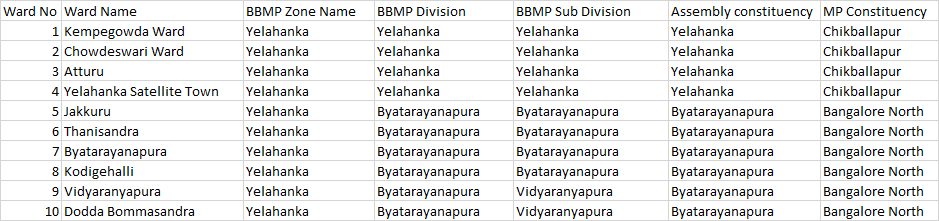

2. Venue Data: Foursquare APIs

## 3. Import all the required libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

print('Libraries imported.')

Libraries imported.


## 4. Data Gathering
### A. Ward Data
#### A.1 Creating dataframe for the ward data

In [2]:
df_wards = pd.read_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\BBMP Ward Information with Map View   OpenCity.in.csv')
df_wards.head()

,Ward No,Ward Name,BBMP Zone Name,BBMP Division,BBMP Sub Division,Assembly constituency,MP Constituency
0,1,Kempegowda Ward,Yelahanka,Yelahanka,Yelahanka,Yelahanka,Chikballapur
1,2,Chowdeswari Ward,Yelahanka,Yelahanka,Yelahanka,Yelahanka,Chikballapur
2,3,Atturu,Yelahanka,Yelahanka,Yelahanka,Yelahanka,Chikballapur
3,4,Yelahanka Satellite Town,Yelahanka,Yelahanka,Yelahanka,Yelahanka,Chikballapur
4,5,Jakkuru,Yelahanka,Byatarayanapura,Byatarayanapura,Byatarayanapura,Bangalore North


In [3]:
#reset the index to Ward No column
df_wards = df_wards.set_index('Ward No', drop = True)

# Clean the data 
## remove columns whicha are not required i.e. BBMP Zone Name, BBMP Division, BBMP Sub Division, Assembly constituency, MP Constituency
df_wards.drop(['BBMP Zone Name', 'BBMP Division','BBMP Sub Division', 'Assembly constituency', 'MP Constituency'], axis=1,inplace=True)

df_wards.head()


,Ward Name
Ward No,
1,Kempegowda Ward
2,Chowdeswari Ward
3,Atturu
4,Yelahanka Satellite Town
5,Jakkuru


#### A.2 Get latitude and longitude coordinates of the Wards

In [4]:
# Correction in the names of wards based on city knowledge and internet search
df_wards.loc[18,'Ward Name'] = 'Radhakrishna Temple'
df_wards.loc[58,'Ward Name'] = 'New TippaSandra'
df_wards.loc[60,'Ward Name'] = 'Sagayarapuram'
df_wards.loc[61,'Ward Name'] = 'S K Garden'
df_wards.loc[63,'Ward Name'] = 'JayaMahal'
df_wards.loc[64,'Ward Name'] = 'RM Guttahalli'
df_wards.loc[73,'Ward Name'] = 'Kottigepalya'
df_wards.loc[90,'Ward Name'] = 'Halasuru'
df_wards.loc[108,'Ward Name'] = 'Sriramamandir'
df_wards.loc[115,'Ward Name'] = 'VannarPet'
df_wards.loc[118,'Ward Name'] = 'Sudhama Nagar'
df_wards.loc[121,'Ward Name'] = 'Binnipete'
df_wards.loc[140,'Ward Name'] = 'Chamrajpet'
df_wards.loc[160,'Ward Name'] = 'RR Nagar'
df_wards.loc[166,'Ward Name'] = 'KariSandra'
df_wards.loc[168,'Ward Name'] = 'Pattabhirama Nagar'
df_wards.loc[169,'Ward Name'] = 'ByraSandra'
df_wards.loc[173,'Ward Name'] = 'JakkaSandra'
df_wards.loc[179,'Ward Name'] = 'Shakambari Nagar'
df_wards.loc[181,'Ward Name'] = 'Kumaraswamy Layout'
df_wards.loc[183,'Ward Name'] = 'ChikkalaSandra'
df_wards.loc[188,'Ward Name'] = 'Bilekahalli'
df_wards.loc[189,'Ward Name'] = 'HongaSandra'
df_wards.loc[191,'Ward Name'] = 'Singasandra'
df_wards.loc[195,'Ward Name'] = 'Konanakunte'

In [5]:
df_wards

,Ward Name
Ward No,
1,Kempegowda Ward
2,Chowdeswari Ward
3,Atturu
4,Yelahanka Satellite Town
5,Jakkuru
6,Thanisandra
7,Byatarayanapura
8,Kodigehalli
9,Vidyaranyapura


In [6]:
# Capturing latitude and longitude coordinate of each ward
df_wards['latitude']=np.nan
df_wards['longitude']=np.nan

for i in df_wards.index:
    address = df_wards['Ward Name'][i] + ', Bengaluru, India'  
    print(address)
    geolocator = Nominatim(user_agent="BL_explorer")
    location = geolocator.geocode(address)
    if location == None:
        df_wards.loc[i, 'latitude'] = np.nan
        df_wards.loc[i,'longitude'] = np.nan
    else:
        df_wards.loc[i,'latitude'] = location.latitude
        df_wards.loc[i,'longitude'] = location.longitude

df_wards.head()

Kempegowda Ward, Bengaluru, India
Chowdeswari Ward, Bengaluru, India
Atturu, Bengaluru, India
Yelahanka Satellite Town, Bengaluru, India
Jakkuru, Bengaluru, India
Thanisandra, Bengaluru, India
Byatarayanapura, Bengaluru, India
Kodigehalli, Bengaluru, India
Vidyaranyapura, Bengaluru, India
Dodda Bommasandra, Bengaluru, India
Kuvempu Nagar, Bengaluru, India
Shettihalli, Bengaluru, India
Mallasandra, Bengaluru, India
Bagalakunte, Bengaluru, India
T Dasarahalli, Bengaluru, India
Jalahalli, Bengaluru, India
J P Park, Bengaluru, India
Radhakrishna Temple, Bengaluru, India
SanJayanagar, Bengaluru, India
Ganga Nagar, Bengaluru, India
Hebbala, Bengaluru, India
Vishwanath Nagenahalli, Bengaluru, India
Nagavara, Bengaluru, India
HBR Layout, Bengaluru, India
Horamavu, Bengaluru, India
Ramamurthy Nagar, Bengaluru, India
Banasavadi, Bengaluru, India
Kammanahalli, Bengaluru, India
Kacharkanahalli, Bengaluru, India
Kadugondanahalli, Bengaluru, India
Kushal Nagar, Bengaluru, India
Kaval Bairasandra, Be

,Ward Name,latitude,longitude
Ward No,,,
1,Kempegowda Ward,12.956432,77.574119
2,Chowdeswari Ward,13.120459,77.579618
3,Atturu,13.316973,77.930483
4,Yelahanka Satellite Town,13.089139,77.582717
5,Jakkuru,13.098320,77.625146


In [7]:
# check for missing values
a = df_wards['latitude'].isnull()
a.value_counts()

False    193
True       5
Name: latitude, dtype: int64

In [8]:
# dropping missing values 
df_wards = df_wards.dropna().reset_index()
df_wards

,Ward No,Ward Name,latitude,longitude
0,1,Kempegowda Ward,12.956432,77.574119
1,2,Chowdeswari Ward,13.120459,77.579618
2,3,Atturu,13.316973,77.930483
3,4,Yelahanka Satellite Town,13.089139,77.582717
4,5,Jakkuru,13.098320,77.625146
5,6,Thanisandra,13.054713,77.633926
6,7,Byatarayanapura,13.062074,77.596392
7,8,Kodigehalli,13.060113,77.576773
8,9,Vidyaranyapura,13.076641,77.557732
9,10,Dodda Bommasandra,13.056340,77.557118


In [9]:
df_wards.shape

(193, 4)

In [10]:
# create map of Bengaluru using latitude and longitude values
map_bangaluru = folium.Map(location=[12.9791198, 77.5912997], zoom_start=12)

# add markers to map
for lat, lng, ward in zip(df_wards['latitude'], df_wards['longitude'], df_wards['Ward Name']):
#     dist = postalcode[1:3]
    label = '{}'.format(ward)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangaluru)  
    
map_bangaluru

From the map, it is clear that there are some wrong latitude and longitude coordinate which should be removed before moving ahead.

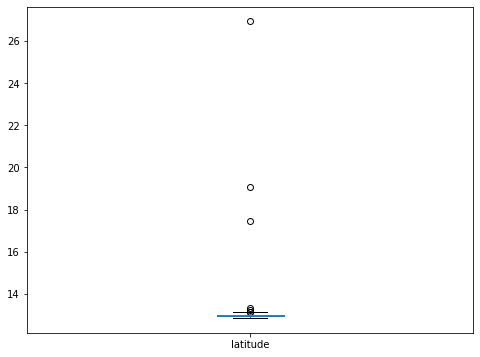

In [11]:
df_wards['latitude'].plot(kind='box', figsize=(8, 6))

Outliers are confirmed by the box plot.

In [12]:
# Latitude outlier removal treatment

df_wards1 = df_wards.copy(deep = True)
df_lat = df_wards[["latitude"]].copy()
Q1 = df_lat["latitude"].quantile(0.25)
Q3 = df_lat["latitude"].quantile(0.75)
IQR = Q3 - Q1
outlier = (df_lat["latitude"] < (Q1 - 1.5 * IQR)) | (df_lat["latitude"] > (Q3 + 1.5 * IQR))
print("Total number of outlier are: ", outlier.sum(axis=0))
df_lat[outlier]=np.nan
# median_Temperature = df_temperature["Temperature(F)"].median()
# df_temperature["Temperature(F)"].replace(np.nan, median_Temperature, inplace=True)
df_wards1[["latitude"]] = df_lat[["latitude"]].copy()
df_wards1 = df_wards1.dropna().reset_index(drop=True)

# Longitude outlier removal treatment
df_lng = df_wards[["longitude"]].copy()
Q1 = df_lng["longitude"].quantile(0.25)
Q3 = df_lng["longitude"].quantile(0.75)
IQR = Q3 - Q1
outlier = (df_lng["longitude"] < (Q1 - 1.5 * IQR)) | (df_lng["longitude"] > (Q3 + 1.5 * IQR))
print("Total number of outlier are: ", outlier.sum(axis=0))
df_lng[outlier]=np.nan
df_wards1[["longitude"]] = df_lng[["longitude"]].copy()
df_wards1 = df_wards1.dropna().reset_index(drop=True)

Total number of outlier are:  7
Total number of outlier are:  14


In [13]:
df_wards1

,Ward No,Ward Name,latitude,longitude
0,1,Kempegowda Ward,12.956432,77.574119
1,2,Chowdeswari Ward,13.120459,77.579618
2,5,Jakkuru,13.098320,77.582717
3,6,Thanisandra,13.054713,77.625146
4,7,Byatarayanapura,13.062074,77.633926
5,8,Kodigehalli,13.060113,77.596392
6,9,Vidyaranyapura,13.076641,77.576773
7,10,Dodda Bommasandra,13.056340,77.557732
8,11,Kuvempu Nagar,13.073193,77.557118
9,12,Shettihalli,12.961250,77.541713


In [14]:
# create map of Bengaluru using latitude and longitude values
map_bangaluru = folium.Map(location=[12.9791198, 77.5912997], zoom_start=12)

# add markers to map
for lat, lng, ward in zip(df_wards1['latitude'], df_wards1['longitude'], df_wards1['Ward Name']):
    label = '{}'.format(ward)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangaluru)  
    
map_bangaluru

In [15]:
df_wards_final = df_wards1.copy(deep=True)
df_wards_final.head()

,Ward No,Ward Name,latitude,longitude
0,1,Kempegowda Ward,12.956432,77.574119
1,2,Chowdeswari Ward,13.120459,77.579618
2,5,Jakkuru,13.098320,77.582717
3,6,Thanisandra,13.054713,77.625146
4,7,Byatarayanapura,13.062074,77.633926


In [16]:
df_wards_final.to_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\df_wards_final.csv')

### B Venue Data
#### B.1 Get the data from Foursquare

In [17]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius, LIMIT):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward Name', 
                  'Ward Latitude', 
                  'Ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
Bengaluru_venues = getNearbyVenues(names=df_wards_final['Ward Name'],
                                   latitudes=df_wards_final['latitude'],
                                   longitudes=df_wards_final['longitude'],
                                   radius = 1000,
                                   LIMIT = 80
                                  )

print('Venues fetching for analysis is completed successfully')

Kempegowda Ward


KeyError: 'groups'

In [ ]:
print('{} venues are collected'.format(Bengaluru_venues.shape[0]))

print('There are {} uniques categories.'.format(len(Bengaluru_venues['Venue Category'].unique())))

In [ ]:
Bengaluru_venues.to_csv(r"C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Bengaluru_venues.csv")

## 5. Ward Level Analysis
let's analyse each ward.

In [20]:
Bengaluru_venues = pd.read_csv(r"C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Bengaluru_venues.csv")

In [23]:
Bengaluru_venues.head()

,Unnamed: 0,Ward Name,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Kempegowda Ward,12.956432,77.574119,Brahmins Coffee Bar,12.953983,77.568862,Breakfast Spot
1,1,Kempegowda Ward,12.956432,77.574119,VB Bakery,12.951687,77.577124,Bakery
2,2,Kempegowda Ward,12.956432,77.574119,Food Street,12.950956,77.577798,Snack Place
3,3,Kempegowda Ward,12.956432,77.574119,Hari Super Sandwich,12.949063,77.574935,Sandwich Place
4,4,Kempegowda Ward,12.956432,77.574119,Bangalore City Institute,12.956925,77.572915,General Entertainment


In [22]:
print(Bengaluru_venues["Venue Category"].value_counts())
Bengaluru_venues["Venue Category"].value_counts().to_csv(r"C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Category.csv")


Indian Restaurant                  710
Café                               269
Fast Food Restaurant               190
Ice Cream Shop                     150
Coffee Shop                        127
Pizza Place                        126
Department Store                   112
Bakery                             104
Chinese Restaurant                 104
Hotel                               83
Vegetarian / Vegan Restaurant       77
Snack Place                         72
Clothing Store                      68
Park                                61
Restaurant                          59
Pub                                 55
Sandwich Place                      54
Asian Restaurant                    53
Breakfast Spot                      50
Shopping Mall                       46
South Indian Restaurant             46
Bus Station                         44
Lounge                              41
Juice Bar                           41
Dessert Shop                        39
Bar                      

The number of categories are high and thus needs to be consolidated for our analysis.
Note: New categories are consolidate outside the jupyter notebook and needs to be imported using csv file.

In [ ]:
df_new_category = pd.read_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Category - Modified.csv')
df_new_category.drop('Unnamed: 3',axis=1, inplace = True)
df_new_category

In [ ]:
df_Bengaluru_venues = pd.merge(Bengaluru_venues,  
         df_new_category,  
         on ='Venue Category',  
         how ='left')
df_Bengaluru_venues.drop(["Unnamed: 0","Venue Category","Count"],axis = 1, inplace = True)
df_Bengaluru_venues

In [ ]:
# one hot encoding
Bengaluru_onehot = pd.get_dummies(df_Bengaluru_venues[['New Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bengaluru_onehot['Ward Name'] = df_Bengaluru_venues['Ward Name'] 

# move neighborhood column to the first column
fixed_columns = [Bengaluru_onehot.columns[-1]] + list(Bengaluru_onehot.columns[:-1])
Bengaluru_onehot = Bengaluru_onehot[fixed_columns]

Bengaluru_onehot.head()

**Next, let's group rows by wards and by taking the mean of the frequency of occurrence of each category**

In [ ]:
Bengaluru_grouped = Bengaluru_onehot.groupby('Ward Name').mean().reset_index()
Bengaluru_grouped

In [ ]:
Bengaluru_grouped.to_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Bengaluru_grouped.csv')

**First, let's write a function to sort the venues in descending order.**

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Now let's create a new dataframe and display the top 10 venues for each district.**

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward Name']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
ward_venues_sorted = pd.DataFrame(columns=columns)
ward_venues_sorted['Ward Name'] = Bengaluru_grouped['Ward Name']

for idx in np.arange(Bengaluru_grouped.shape[0]):
    ward_venues_sorted.iloc[idx, 1:] = return_most_common_venues(Bengaluru_grouped.iloc[idx, :], num_top_venues)

In [ ]:
ward_venues_sorted

In [ ]:
ward_venues_sorted.to_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\ward_venues_sorted.csv')

## 6. Cluster Wards of Bengaluru City

### 6.A Optimal K value selection using elbow method
In order to run k-means to cluster the wards, we need to identify optimul cluster number.

In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,100) 

Bengaluru_grouped_clustering = Bengaluru_grouped.drop('Ward Name', 1)


for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Bengaluru_grouped_clustering) 
    kmeanModel.fit(Bengaluru_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(Bengaluru_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Bengaluru_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Bengaluru_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Bengaluru_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [ ]:
# Plot the distortions
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [ ]:
# Plot the intertias
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

To determine the optimal number of clusters, we should select the value of k at the “elbow” i.e. the point after which the distortion/inertia start decreasing in a linear fashion. However, looking at the the graph, we don't see any elbow point and thus ***don't have any  optimal number of clusters*** for the data.

As a result, the code was executed with different values of K and looking at the different clusters, we concluded that K = 4 provides the business wise optimal value. 

### 6.B Performing Clustering 

In [ ]:
# set number of clusters
kclusters = 4

Bengaluru_grouped_clustering = Bengaluru_grouped.drop('Ward Name', 1)
print(Bengaluru_grouped_clustering.shape)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bengaluru_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

In [ ]:
# add clustering labels
ward_venues_sorted.drop('Cluster Labels',axis =1, inplace = True)
ward_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:
df_Bengaluru_merged = pd.merge(df_wards_final,  ward_venues_sorted, on = 'Ward Name', how = 'left')

df_Bengaluru_merged


In [ ]:
df_Bengaluru_merged['Cluster Labels'].value_counts()

### 6.C Plot the clusters on the map
Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[12.9791198, 77.5912997], zoom_start=12)

# set colors
rainbow = ['blue', 'red', 'black','green']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Bengaluru_merged['latitude'], df_Bengaluru_merged['longitude'], df_Bengaluru_merged['Ward Name'], df_Bengaluru_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 7. Examine Clusters
### Cluster 1

In [ ]:
cluster1 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 0, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster1

### Cluster 2

In [ ]:
cluster2 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 1, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster2

### Cluster 3

In [ ]:
cluster3 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 2, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster3

### Cluster 4

In [ ]:
cluster4 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 3, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster4

## 8. Results:

Based on the data, every ward in the city was classified into one of the four clusters. This was achieved through unsupervised learning alogorithm of clustering using K- means. These four cluster were created from the data fetched from the foursqure API's related to venues. 


## 9. Observations

**Cluster 1:** In this cluster, first 3 'most common venues' are related to the food. 


**Cluster 2:** In this cluster, first 3 'most common venues' are related to Sports, Gym & Fitness Center, Entertainment, Travel, Supermarket and restaurant, park etc

**Cluster 3:** In this cluster, first 3 'most common venues' are related to food and more specifically to Indian Restaurants, snack & refreshments and Groceries

**Cluster 4:** In this cluster, first 4 'most common venues' are related to ATM, Sports, Gym & Fitness Center, Automobile.

## 10. Conclusion:
1. Based on clusters obtained and observations made, following conclusion can be drawn: 

Cluster | Suitable for | 
--- | --- |
1 | For the people loving different types food or bachelors who love to eat outside instead of cooking at home |
2 |  For the people who are extroverts, who love to go out and enjoy or families who need all rouded facilities like Gym, sports, entertainment, parks, easy travel arrangment for schools and offices|
3 | For the people who love traditional food or native food, mostly to the higher age people who are accustomed to the native/traditional food items |
4 |  For the people who enjoys food prepared at home but like to go out for sprorts, gym and fitness center, have personal vehicles |


2. Though these conclusions are drawn on the basis of cluster, these don't feels distinctive clusters. Some of these clusters feel overlapping and clear demarkation is absent. 


3. Also, when we tried to identify optimal 'K' value for clustering using K-means, there was no clear output using elbow method. 


4. Foursquare venue data had different categories present, however some of the key categories were missing e.g. Hospitals, Schools, Banks, Parks, Day Care Centres and Amusement Parks in the locality. THere is high prescense of food related categories. Thus clustering is heavily biased towards food cateogry. More elaborate venue data is required for better analysis of the neighbourhood.